In [11]:
# HIDDEN
Base.displaysize() = (5, 80)

## Customizing Plots using `StatsPlots`

The many attributes available in Plots.jl allows us to customize the appearance of our figures, such as modifying it's title, changing the x or y-labels, adding annotations, and combining figures. For a full list of the available attributes check out the [documentation](http://docs.juliaplots.org/latest/attributes/).

Let's first import `StatsPlots`:

In [2]:
using StatsPlots

### Customizing Figures and Axes

Use `plot` to create a new plot object, and `plot!` to modify an existing one:

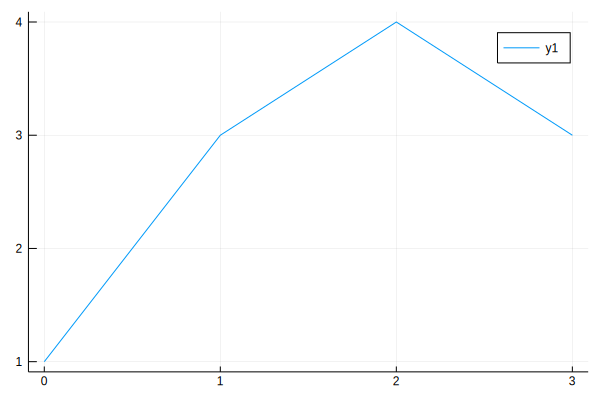

In [3]:
plot([0, 1, 2, 3], [1, 3, 4, 3])

To customize a plot, we can use other methods on the axes object:

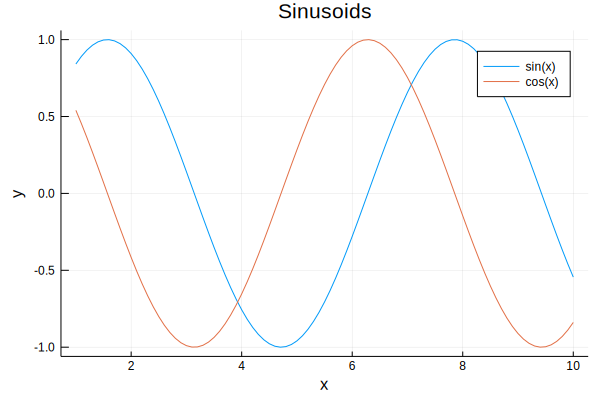

In [4]:
using StatsBase

x = collect(1:0.1:10)
plot(x, sin.(x), label="sin(x)")
plot!(x, cos.(x), label="cos(x)")
plot!(title="Sinusoids", xlabel="x", ylabel="y")

As stated previously, using `plot!` will modify the existing plot. The `!` operator also works in combination with the other shorthand plotting functions:

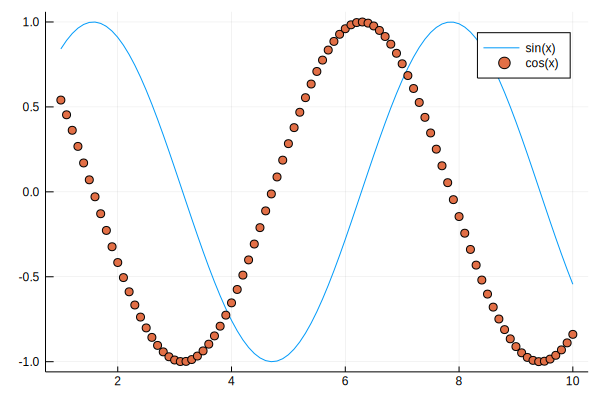

In [5]:
plot(x, sin.(x), label="sin(x)")
scatter!(x, cos.(x), label="cos(x)")

We can recreate one of the plots above using `!` and some useful customization functions:

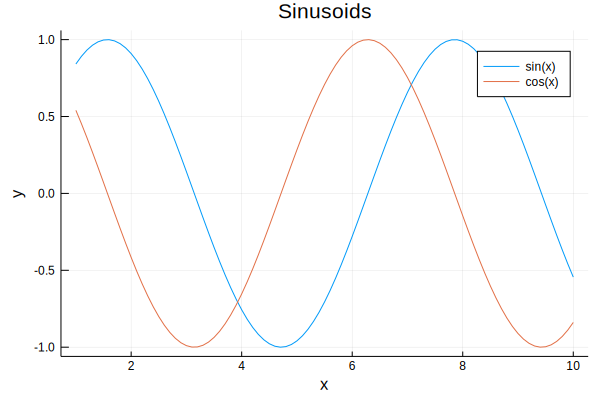

In [6]:
x = collect(1:0.1:10)
plot(x, sin.(x), label="sin(x)")
plot!(x, cos.(x), label="cos(x)")
title!("Sinusoids")
xlabel!("x")
ylabel!("y")

### Customizing Marks

To change properties of the plot marks themselves (e.g. the lines in the plot above), we can pass additional arguments into `plot`:

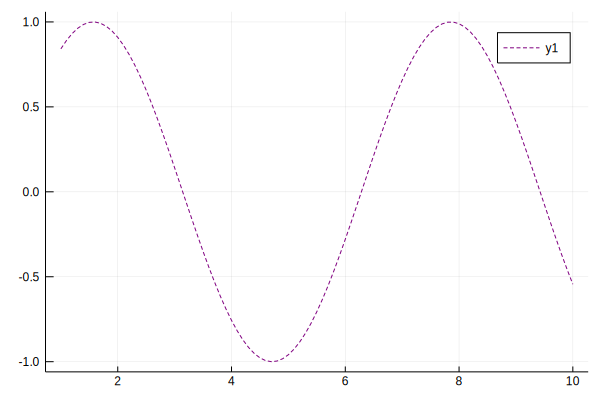

In [7]:
plot(x, sin.(x), linestyle=:dash, linecolor=:purple)

Checking the documentation for [Plots](http://docs.juliaplots.org/latest/) and [StatsPlots](https://github.com/JuliaPlots/StatsPlots.jl) is the easiest way to figure out which arguments are available for each method.

### Combining Multiple Plots as Subplots

We can combine multiple plots as subplots by using the `layout` keyword to obtain more complex visualizations.

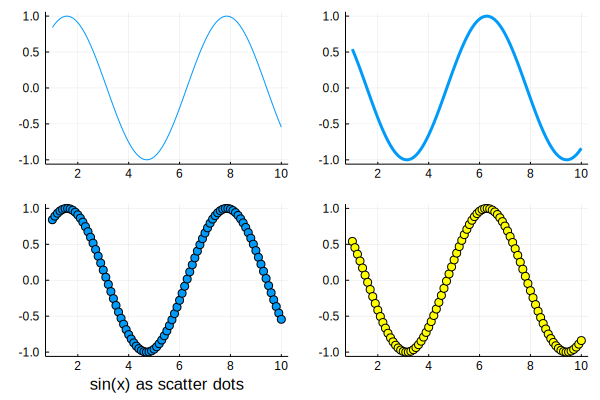

In [8]:
p1 = plot(x, sin.(x))
p2 = plot(x, cos.(x), lw=3)
p3 = scatter(x, sin.(x), xlabel="sin(x) as scatter dots")
p4 = scatter(x, cos.(x), color=:yellow)
plot(p1,p2,p3,p4,layout=(2,2),legend=false)

The attributes in each individual plot are applied to that specific subplot, but the attributes in the final `plot` will be applied to all subplots.

### Aribitrary text and LaTeX support

In `StatsPlots`, text can be added either relative to an individual axis object
or to the whole figure.

These attributes set text to the axes or subplot. They can also be used in conjunction to the `!` operator:

- `title` - add a title to the subplot
- `xlabel` - add an axis label to the x-axis
- `ylabel` - add an axis label to the y-axis
- `legendtitle` - add title to the legend
- `annotations` - add an annotation at x,y position
- `series_annotations` - add annotations mapped to data points/positions

And these act on the whole figure:

- `figtext()` - add text at an arbitrary location
- `window_title` - Add title to the window

To represent LaTeX expressions we can use the package `LaTeXString` and construct `LaTeXString` literals with the constructor `L"..."`.

This example illustrates a possible combination:

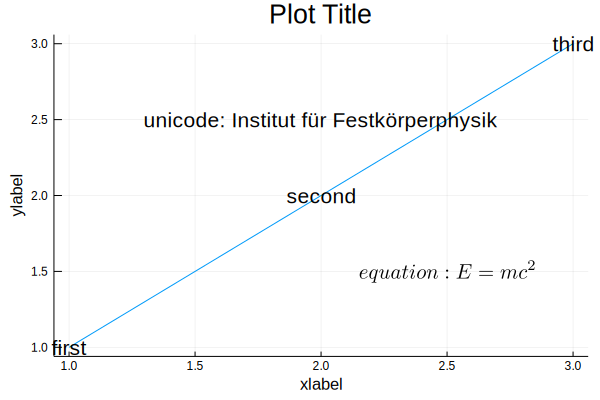

In [9]:
using LaTeXStrings

plot([1, 2, 3], [1, 2, 3], series_annotations=["first", "second", "third"])
plot!(title="Plot Title", titlefontsize=18, legend=false)
xlabel!("xlabel")
ylabel!("ylabel")
plot!(annotations=(2.5, 1.5, L"equation: E=mc^2"))
plot!(annotations=(2, 2.5, "unicode: Institut für Festkörperphysik"))

### Customizing a `StatsPlot` plot

Now that we've seen how we can customize a plot, we can use a combination of those methods to improve how we display data. Let's load the titanic dataset once again:

In [12]:
using DataFrames
using CSV

ti = CSV.read("data/titanic.csv", ignoreemptylines=true)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who
,Int64,Int64,String,Float64,Int64,Int64,Float64,String,String,String
1,1,1,female,38.0,1,0,71.2833,C,First,woman
2,1,1,female,35.0,1,0,53.1,S,First,woman
3,0,1,male,54.0,0,0,51.8625,S,First,man
4,1,3,female,4.0,1,1,16.7,S,Third,child
5,1,1,female,58.0,0,0,26.55,S,First,woman
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


We'll start with this plot:

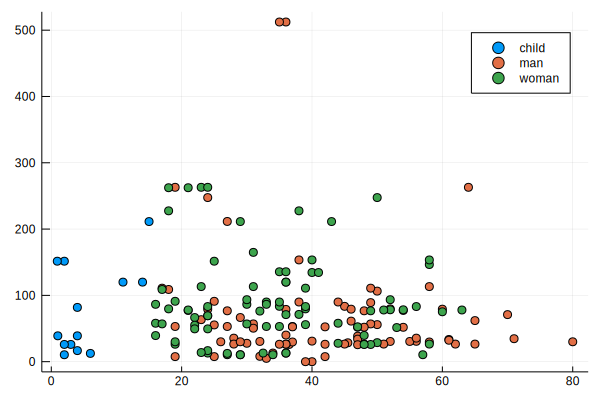

In [13]:
@df ti scatter(:age, :fare, group=:who)

We can see that the plot needs a title and better labels for the x and y-axes. In addition, the two people with the most expensive fares survived, so we can annotate them on our plot.

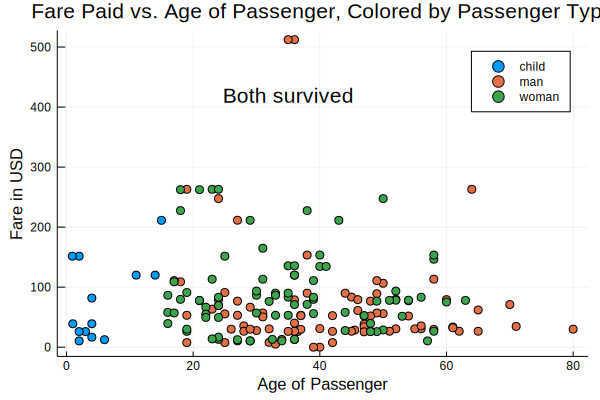

In [14]:
@df ti scatter(:age, :fare, group=:who)
title!("Fare Paid vs. Age of Passenger, Colored by Passenger Type")
xlabel!("Age of Passenger")
ylabel!("Fare in USD")
plot!(annotations=(35, 420, "Both survived"))

In practice, we use `StatsPlots` to quickly explore the data and then turn to the `Plots` documentation for fine-tuning through the available attributes.

Depending on your data, another graphical backend might be more appropriate for your needs. Check the [documentation](http://docs.juliaplots.org/latest/backends/) before starting your project to evaluate the benefits of each one according to your use case.